# Smooth manifolds, vector fields and tensor fields

This woksheet accompanies the lecture
[Symbolic tensor calculus on manifolds](http://sagemanifolds.obspm.fr/jncf2018/) at JNCF 2018.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/JNCF2018/jncf18_vector.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, via the command `sage -n jupyter`

In [1]:
%display latex

Let us restore the 2-sphere manifold constructed in the [preceeding worksheet](http://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/JNCF2018/jncf18_scalar.ipynb):

In [2]:
M = Manifold(2, 'M')
U = M.open_subset('U')
XU.<x,y> = U.chart()
V = M.open_subset('V')
XV.<xp,yp> = V.chart("xp:x' yp:y'")
M.declare_union(U,V)
XU_to_XV = XU.transition_map(XV, 
                             (x/(x^2+y^2), y/(x^2+y^2)), 
                             intersection_name='W',
                             restrictions1= x^2+y^2!=0, 
                             restrictions2= xp^2+yp^2!=0)
XV_to_XU = XU_to_XV.inverse()
M.atlas()

[Chart (U, (x, y)),
 Chart (V, (xp, yp)),
 Chart (W, (x, y)),
 Chart (W, (xp, yp))]

We also reconstruct the point $p$:

In [3]:
p = U((1,2), chart=XU, name='p')
print(p)

Point p on the 2-dimensional differentiable manifold M


and the embedding $\mathbb{S}^2 \to \mathbb{R}^3$:

In [4]:
R3 = Manifold(3, 'R^3', r'\mathbb{R}^3')
XR3.<X,Y,Z> = R3.chart()
Phi = M.diff_map(R3, {(XU, XR3): 
                       [2*x/(1+x^2+y^2), 2*y/(1+x^2+y^2),
                        (x^2+y^2-1)/(1+x^2+y^2)],
                      (XV, XR3): 
                       [2*xp/(1+xp^2+yp^2), 2*yp/(1+xp^2+yp^2),
                        (1-xp^2-yp^2)/(1+xp^2+yp^2)]},
                  name='Phi', latex_name=r'\Phi')
Phi.display()

Phi: M --> R^3
on U: (x, y) |--> (X, Y, Z) = (2*x/(x^2 + y^2 + 1), 2*y/(x^2 + y^2 + 1), (x^2 + y^2 - 1)/(x^2 + y^2 + 1))
on V: (xp, yp) |--> (X, Y, Z) = (2*xp/(xp^2 + yp^2 + 1), 2*yp/(xp^2 + yp^2 + 1), -(xp^2 + yp^2 - 1)/(xp^2 + yp^2 + 1))

In [5]:
graph = XU.plot(chart=XR3, mapping=Phi, number_values=25, 
                label_axes=False) + \
        XV.plot(chart=XR3, mapping=Phi, number_values=25, 
                color='green', label_axes=False) + \
        p.plot(chart=XR3, mapping=Phi, label_offset=0.05)
show(graph, viewer='threejs', online=True)

Graphics3d Object

Finally we reconstruct the scalar field $f$:

In [6]:
f = M.scalar_field({XU: 1/(1+x^2+y^2), XV: (xp^2+yp^2)/(1+xp^2+yp^2)},
                   name='f')
f.display()

f: M --> R
on U: (x, y) |--> 1/(x^2 + y^2 + 1)
on V: (xp, yp) |--> (xp^2 + yp^2)/(xp^2 + yp^2 + 1)

In [7]:
CM = M.scalar_field_algebra()
CM

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold M

## Tangent vectors

In [8]:
Tp = M.tangent_space(p)
Tp

Tangent space at Point p on the 2-dimensional differentiable manifold M

In [9]:
print(Tp.category())

Category of finite dimensional vector spaces over Symbolic Ring


In [10]:
dim(Tp)

2

In [11]:
type(Tp)

<class 'sage.manifolds.differentiable.tangent_space.TangentSpace_with_category'>

In [12]:
isinstance(Tp, FiniteRankFreeModule)

True

In [13]:
Tp.bases()

[Basis (d/dx,d/dy) on the Tangent space at Point p on the 2-dimensional differentiable manifold M,
 Basis (d/dxp,d/dyp) on the Tangent space at Point p on the 2-dimensional differentiable manifold M]

In [14]:
Tp.default_basis()

Basis (d/dx,d/dy) on the Tangent space at Point p on the 2-dimensional differentiable manifold M

In [15]:
vp = Tp((-3, 2), name='v')
print(vp)

Tangent vector v at Point p on the 2-dimensional differentiable manifold M


In [16]:
vp.display()

v = -3 d/dx + 2 d/dy

In [17]:
vp.parent()

Tangent space at Point p on the 2-dimensional differentiable manifold M

In [18]:
vp in Tp

True

In [19]:
graph += vp.plot(chart=XR3, mapping=Phi, scale=0.5, color='gold')
show(graph, viewer='threejs', online=True)

Graphics3d Object

In [20]:
YM = M.vector_field_module()
YM

Module X(M) of vector fields on the 2-dimensional differentiable manifold M

In [21]:
YM.category()

Category of modules over Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold M

In [22]:
YM.base_ring() is CM

True

In [23]:
isinstance(YM, FiniteRankFreeModule)

False

In [24]:
M.is_manifestly_parallelizable()

False

In [25]:
type(YM)

<class 'sage.manifolds.differentiable.vectorfield_module.VectorFieldModule_with_category'>

In [26]:
YU = U.vector_field_module()
isinstance(YU, FiniteRankFreeModule)

True

In [27]:
U.is_manifestly_parallelizable()

True

In [28]:
U.is_manifestly_coordinate_domain()

True

In [29]:
U.atlas()

[Chart (U, (x, y)), Chart (W, (x, y)), Chart (W, (xp, yp))]

In [30]:
YU.base_ring() is U.scalar_field_algebra()

True

In [31]:
rank(YU)

2

In [32]:
type(YU)

<class 'sage.manifolds.differentiable.vectorfield_module.VectorFieldFreeModule_with_category'>

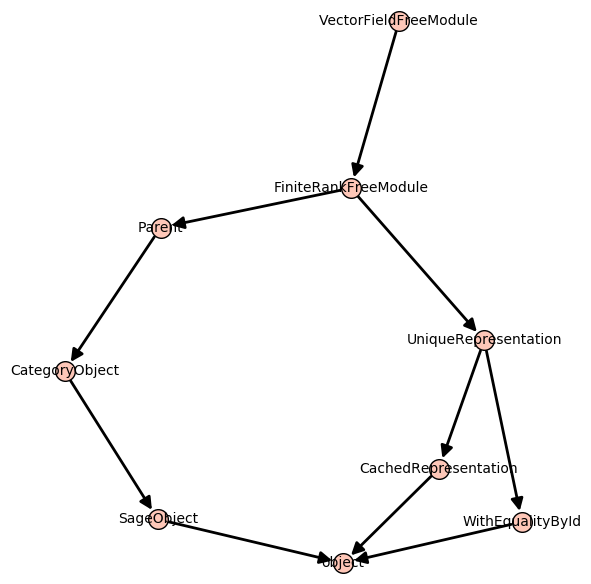

In [33]:
class_graph(
sage.manifolds.differentiable.vectorfield_module.VectorFieldFreeModule
).plot()

In [34]:
YU.bases()

[Coordinate frame (U, (d/dx,d/dy))]

In [35]:
eU = YU.default_basis()
eU

Coordinate frame (U, (d/dx,d/dy))

In [36]:
YV = V.vector_field_module()
YV.bases()

[Coordinate frame (V, (d/dxp,d/dyp))]

In [37]:
eV = YV.default_basis()
eV

Coordinate frame (V, (d/dxp,d/dyp))

In [38]:
W = U.intersection(V)
YW = W.vector_field_module()
YW.bases()

[Coordinate frame (W, (d/dx,d/dy)), Coordinate frame (W, (d/dxp,d/dyp))]

In [39]:
eUW = eU.restrict(W)
eVW = eV.restrict(W)
YW.bases() == [eUW, eVW]

True

In [40]:
W.changes_of_frame()

{(Coordinate frame (W, (d/dx,d/dy)),
  Coordinate frame (W, (d/dxp,d/dyp))): Field of tangent-space automorphisms on the Open subset W of the 2-dimensional differentiable manifold M,
 (Coordinate frame (W, (d/dxp,d/dyp)),
  Coordinate frame (W, (d/dx,d/dy))): Field of tangent-space automorphisms on the Open subset W of the 2-dimensional differentiable manifold M}

In [41]:
P = W.change_of_frame(eUW, eVW)
P

Field of tangent-space automorphisms on the Open subset W of the 2-dimensional differentiable manifold M

In [42]:
P.parent()

General linear group of the Free module X(W) of vector fields on the Open subset W of the 2-dimensional differentiable manifold M

In [43]:
P[:]

[-x^2 + y^2     -2*x*y]
[    -2*x*y  x^2 - y^2]

In [44]:
v = M.vector_field(name='v')
v[eU, 0] = f.restrict(U)
v[eU, 1] = -2
v.display(eU)

v = 1/(x^2 + y^2 + 1) d/dx - 2 d/dy

In [45]:
v[[0]]

Scalar field f on the Open subset U of the 2-dimensional differentiable manifold M

In [46]:
v[[0]].display()

f: U --> R
   (x, y) |--> 1/(x^2 + y^2 + 1)
on W: (xp, yp) |--> (xp^2 + yp^2)/(xp^2 + yp^2 + 1)

In [47]:
v.restrict(W).display(eUW)

v = 1/(x^2 + y^2 + 1) d/dx - 2 d/dy

In [48]:
v.restrict(W).display(eVW)

v = (4*x*y^3 - x^2 + 4*(x^3 + x)*y + y^2)/(x^6 + y^6 + (3*x^2 + 1)*y^4 + x^4 + (3*x^4 + 2*x^2)*y^2) d/dxp - 2*(x^4 - y^4 + x^2 + x*y - y^2)/(x^6 + y^6 + (3*x^2 + 1)*y^4 + x^4 + (3*x^4 + 2*x^2)*y^2) d/dyp

In [49]:
v.restrict(W).display(eVW, XV.restrict(W))

v = -(xp^4 - 4*xp*yp^3 - yp^4 - 4*(xp^3 + xp)*yp)/(xp^2 + yp^2 + 1) d/dxp - 2*(xp^4 + xp^3*yp + xp*yp^3 - yp^4 + xp^2 - yp^2)/(xp^2 + yp^2 + 1) d/dyp

In [50]:
v.add_comp_by_continuation(eV, W, chart=XV)

In [51]:
v.display(eV)

v = -(xp^4 - 4*xp*yp^3 - yp^4 - 4*(xp^3 + xp)*yp)/(xp^2 + yp^2 + 1) d/dxp - 2*(xp^4 + xp^3*yp + xp*yp^3 - yp^4 + xp^2 - yp^2)/(xp^2 + yp^2 + 1) d/dyp

In [52]:
N = M((0,0), chart=XV, name='N')
print(N)

Point N on the 2-dimensional differentiable manifold M


In [53]:
XR3(Phi(N))

(0, 0, 1)

In [54]:
v.at(N).display()

v = 0

In [55]:
v.at(p).display()

v = 1/6 d/dx - 2 d/dy

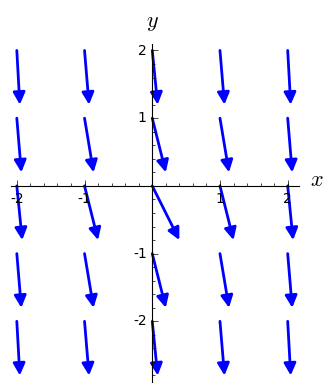

In [56]:
v.plot(chart=XU, chart_domain=XU, max_range=2, 
       number_values=5, scale=0.4, aspect_ratio=1)

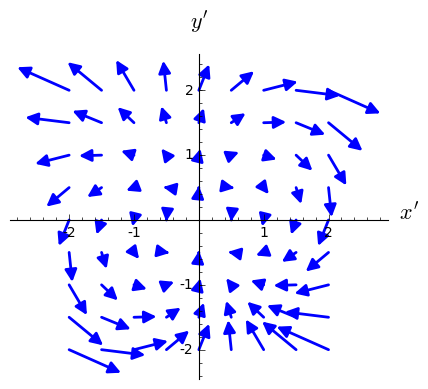

In [57]:
v.plot(chart=XV, chart_domain=XV, max_range=2, 
       number_values=9, scale=0.05, aspect_ratio=1)

In [58]:
graph_v = v.plot(chart=XR3, mapping=Phi, chart_domain=XU, 
                 number_values=7, scale=0.2) + \
          v.plot(chart=XR3, mapping=Phi, chart_domain=XV, 
                 number_values=7, scale=0.2)
show(graph + graph_v, viewer='threejs', online=True)

Graphics3d Object

In [59]:
v._restrictions

{Open subset V of the 2-dimensional differentiable manifold M: Vector field v on the Open subset V of the 2-dimensional differentiable manifold M,
 Open subset W of the 2-dimensional differentiable manifold M: Vector field v on the Open subset W of the 2-dimensional differentiable manifold M,
 Open subset U of the 2-dimensional differentiable manifold M: Vector field v on the Open subset U of the 2-dimensional differentiable manifold M}

In [60]:
vU = v._restrictions[U]
vU is v.restrict(U)

True

In [61]:
vU._components

{Coordinate frame (U, (d/dx,d/dy)): 1-index components w.r.t. Coordinate frame (U, (d/dx,d/dy))}

In [62]:
v._restrictions[W]._components

{Coordinate frame (W, (d/dx,d/dy)): 1-index components w.r.t. Coordinate frame (W, (d/dx,d/dy)),
 Coordinate frame (W, (d/dxp,d/dyp)): 1-index components w.r.t. Coordinate frame (W, (d/dxp,d/dyp))}

In [63]:
w = v + f*v
w

Vector field on the 2-dimensional differentiable manifold M

In [64]:
v.__add__??

In [65]:
v._add_??

In [66]:
vU._add_??

In [67]:
vf = v(f)
vf

Scalar field v(f) on the 2-dimensional differentiable manifold M

In [68]:
vf.display()

v(f): M --> R
on U: (x, y) |--> 2*(2*y^3 + 2*(x^2 + 1)*y - x)/(x^6 + y^6 + 3*(x^2 + 1)*y^4 + 3*x^4 + 3*(x^4 + 2*x^2 + 1)*y^2 + 3*x^2 + 1)
on V: (xp, yp) |--> -2*(xp^5 + 2*xp^3*yp^2 + xp*yp^4 - 2*yp^5 - 2*(2*xp^2 + 1)*yp^3 - 2*(xp^4 + xp^2)*yp)/(xp^6 + yp^6 + 3*(xp^2 + 1)*yp^4 + 3*xp^4 + 3*(xp^4 + 2*xp^2 + 1)*yp^2 + 3*xp^2 + 1)

In [69]:
df = f.differential() ; print(df)

1-form df on the 2-dimensional differentiable manifold M


In [70]:
t = v * df
t

Tensor field of type (1,1) on the 2-dimensional differentiable manifold M

In [71]:
t.display()

v*df = -2*x/(x^6 + y^6 + 3*(x^2 + 1)*y^4 + 3*x^4 + 3*(x^4 + 2*x^2 + 1)*y^2 + 3*x^2 + 1) d/dx*dx - 2*y/(x^6 + y^6 + 3*(x^2 + 1)*y^4 + 3*x^4 + 3*(x^4 + 2*x^2 + 1)*y^2 + 3*x^2 + 1) d/dx*dy + 4*x/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dy*dx + 4*y/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dy*dy

In [72]:
t.display(eV)

v*df = -2*(xp^5 - 4*xp^2*yp^3 - xp*yp^4 - 4*(xp^4 + xp^2)*yp)/(xp^6 + yp^6 + 3*(xp^2 + 1)*yp^4 + 3*xp^4 + 3*(xp^4 + 2*xp^2 + 1)*yp^2 + 3*xp^2 + 1) d/dxp*dxp - 2*(xp^4*yp - 4*xp*yp^4 - yp^5 - 4*(xp^3 + xp)*yp^2)/(xp^6 + yp^6 + 3*(xp^2 + 1)*yp^4 + 3*xp^4 + 3*(xp^4 + 2*xp^2 + 1)*yp^2 + 3*xp^2 + 1) d/dxp*dyp - 4*(xp^5 + xp^4*yp + xp^2*yp^3 - xp*yp^4 + xp^3 - xp*yp^2)/(xp^6 + yp^6 + 3*(xp^2 + 1)*yp^4 + 3*xp^4 + 3*(xp^4 + 2*xp^2 + 1)*yp^2 + 3*xp^2 + 1) d/dyp*dxp - 4*(xp^3*yp^2 + xp*yp^4 - yp^5 - yp^3 + (xp^4 + xp^2)*yp)/(xp^6 + yp^6 + 3*(xp^2 + 1)*yp^4 + 3*xp^4 + 3*(xp^4 + 2*xp^2 + 1)*yp^2 + 3*xp^2 + 1) d/dyp*dyp

In [73]:
t.display_comp()

v*df^x_x = -2*x/(x^6 + y^6 + 3*(x^2 + 1)*y^4 + 3*x^4 + 3*(x^4 + 2*x^2 + 1)*y^2 + 3*x^2 + 1) 
v*df^x_y = -2*y/(x^6 + y^6 + 3*(x^2 + 1)*y^4 + 3*x^4 + 3*(x^4 + 2*x^2 + 1)*y^2 + 3*x^2 + 1) 
v*df^y_x = 4*x/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) 
v*df^y_y = 4*y/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1)

In [74]:
t.parent()

Module T^(1,1)(M) of type-(1,1) tensors fields on the 2-dimensional differentiable manifold M

In [75]:
t._restrictions

{Open subset V of the 2-dimensional differentiable manifold M: Tensor field v*df of type (1,1) on the Open subset V of the 2-dimensional differentiable manifold M,
 Open subset U of the 2-dimensional differentiable manifold M: Tensor field v*df of type (1,1) on the Open subset U of the 2-dimensional differentiable manifold M}